In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [2]:
datos = pdr.DataReader("MELI","yahoo","20150101","20200101")
datos.count()


High         1258
Low          1258
Open         1258
Close        1258
Volume       1258
Adj Close    1258
dtype: int64

In [3]:
set_train = datos.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range=(0, 1))

set_train_sc = sc.fit_transform(set_train)
x_train = []
y_train = []

for i in range(80, 1258):
    x_train.append(set_train_sc[i-60: i, 0])
    y_train.append(set_train_sc[i,0])


In [4]:
x_train, y_train = np.array(x_train), np.array(y_train)

#AGREGAMOS UNA DIMENSION A LA MATRIZ NUMPY CON RESHAPE, EN EL XTRAIN DONDE ESTAN LOS INPUTS
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

#Modelamos con Keras
regresor = Sequential()

#Agregamos capas imputs con LSTM, en este caso pondremos 50 celdas LSTM, un dropout del 20%
regresor.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1],1)))
regresor.add(Dropout(0.2))

#2da capa LSTM
regresor.add(LSTM(units=50, return_sequences=True))
regresor.add(Dropout(0.2))
#3ra capa LSTM
regresor.add(LSTM(units=50, return_sequences=True))
regresor.add(Dropout(0.2))
#4ta capa LSTM
regresor.add(LSTM(units=50))
regresor.add(Dropout(0.2))

In [5]:
#CREAMOS LA CAPA OUTPUT con Dense
regresor.add(Dense(units=1))
#USAREMOS el optimizador RSMPROP que es recomendable para redes neuronales recurrentes. Y ADAM
regresor.compile(optimizer='adam', loss='mean_squared_error')
#Con esto ya se tiene compilado, ahora pasaremos a entrenar el modelo
regresor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
37/37 [==============================] - 4s 107ms/step - loss: 0.0300
Epoch 2/100
37/37 [==============================] - 4s 105ms/step - loss: 0.0044
Epoch 3/100
37/37 [==============================] - 4s 99ms/step - loss: 0.0051
Epoch 4/100
37/37 [==============================] - 4s 99ms/step - loss: 0.0039
Epoch 5/100
37/37 [==============================] - 4s 102ms/step - loss: 0.0033
Epoch 6/100
37/37 [==============================] - 4s 100ms/step - loss: 0.0034
Epoch 7/100
37/37 [==============================] - 4s 98ms/step - loss: 0.0032
Epoch 8/100
37/37 [==============================] - 4s 99ms/step - loss: 0.0030
Epoch 9/100
37/37 [==============================] - 4s 100ms/step - loss: 0.0031
Epoch 10/100
37/37 [==============================] - 4s 101ms/step - loss: 0.0029
Epoch 11/100
37/37 [==============================] - 4s 99ms/step - loss: 0.0033
Epoch 12/100
37/37 [==============================] - 4s 99ms/step - loss: 0.0028
Epoch 13/100
37/37 

Epoch 100/100
37/37 [==============================] - 4s 100ms/step - loss: 0.0011


In [6]:
datos_test = pdr.DataReader("MELI","yahoo","20200101","20200202")
datos_test.count()

High         21
Low          21
Open         21
Close        21
Volume       21
Adj Close    21
dtype: int64

In [7]:
set_test = datos_test.iloc[:, 1:2].values
#Hacemos la concatenación de los datos train con los test con un axis 0 porque deseamos trabajar con la columna(0=columna 1=fila)
datos_total = pd.concat((datos['Open'], datos_test['Open']),axis=0)
inputs = datos_total[len(datos_total) - len(datos_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [8]:
#Le damos la dimension extra
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60: i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#hacemos la predicción
prediccion_precio = regresor.predict(x_test)
prediccion_precio = sc.inverse_transform(prediccion_precio)


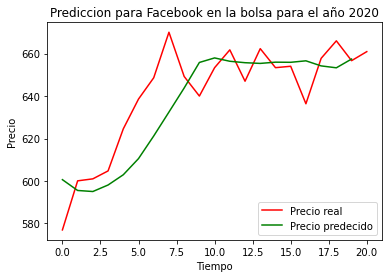

In [9]:
#Visualizamos resultados
plt.plot(set_test, color='red', label='Precio real')
plt.plot(prediccion_precio, color='green', label= 'Precio predecido')
plt.title('Prediccion para Facebook en la bolsa para el año 2020')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.show()